In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
Dtrain = pd.read_csv("../CWRU Dataset-2-train.csv")
Dtest = pd.read_csv("../CWRU Dataset-2-test.csv")

In [3]:
print(Dtrain.shape)
print(Dtest.shape)

(290688, 4)
(72672, 4)


In [4]:
Dtrain["Bearing"].value_counts()

Inner Race (0.021")    96896
Outer Race (0.021")    96896
Normal                 96896
Name: Bearing, dtype: int64

In [5]:
Dtrain["Bearing"].value_counts(normalize=True)*100

Inner Race (0.021")    33.333333
Outer Race (0.021")    33.333333
Normal                 33.333333
Name: Bearing, dtype: float64

In [6]:
Dtest.columns

Index(['Bearing', 'Fault Diameter', 'DE', 'FE'], dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtrain["Bearing"] = labelencoder_train.fit_transform(Dtrain["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtrain = ct.fit_transform(Dtrain)

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtest["Bearing"] = labelencoder_train.fit_transform(Dtest["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtest = ct.fit_transform(Dtest)

print(Dtest)

[[ 0.          1.          0.          0.         -0.04965046 -0.09635818]
 [ 0.          1.          0.          0.         -0.00438092 -0.11957455]
 [ 0.          1.          0.          0.         -0.00333785 -0.11258909]
 ...
 [ 0.          0.          1.          0.021      -0.2399979   0.29523818]
 [ 0.          0.          1.          0.021      -0.27410928  0.10067273]
 [ 0.          0.          1.          0.021       0.14578553  0.25353091]]


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(Dtrain))
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(Dtest))

In [10]:
from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers

Using TensorFlow backend.


In [11]:
import tensorflow as tf
from numpy.random import seed
seed(10)
tf.random.set_seed(10)
act_func = 'elu'

In [12]:
# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(32, activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(2, activation=act_func, kernel_initializer='glorot_uniform'))

model.add(Dense(32, activation=act_func, kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1], kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for 100 epochs, batch size of 10: 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
_________________________________________________________________
dense_3 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [13]:
NUM_EPOCHS=100
BATCH_SIZE=1000
history=model.fit(X_train,X_train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  verbose = 1,
                  shuffle = False)

Train on 261619 samples, validate on 29069 samples
Epoch 1/100
261619/261619 [==============================] - 1s 3us/step - loss: 0.0569 - val_loss: 9.5369e-04
Epoch 2/100
261619/261619 [==============================] - 1s 2us/step - loss: 0.0508 - val_loss: 0.0013
Epoch 3/100
261619/261619 [==============================] - 1s 3us/step - loss: 0.0539 - val_loss: 8.0935e-04
Epoch 4/100
261619/261619 [==============================] - 1s 3us/step - loss: 0.0321 - val_loss: 9.2132e-04
Epoch 5/100
261619/261619 [==============================] - 1s 3us/step - loss: 0.0050 - val_loss: 8.1028e-04
Epoch 6/100
261619/261619 [==============================] - 1s 2us/step - loss: 9.4856e-04 - val_loss: 8.0931e-04
Epoch 7/100
261619/261619 [==============================] - 1s 2us/step - loss: 4.5281e-04 - val_loss: 7.9972e-04
Epoch 8/100
261619/261619 [==============================] - 1s 3us/step - loss: 4.2399e-04 - val_loss: 7.9465e-04
Epoch 9/100
261619/261619 [==========================

261619/261619 [==============================] - 1s 3us/step - loss: 4.0390e-04 - val_loss: 6.1742e-04
Epoch 72/100
261619/261619 [==============================] - 1s 3us/step - loss: 4.0333e-04 - val_loss: 6.0769e-04
Epoch 73/100
261619/261619 [==============================] - 1s 3us/step - loss: 4.0081e-04 - val_loss: 5.9690e-04
Epoch 74/100
261619/261619 [==============================] - 1s 3us/step - loss: 3.9872e-04 - val_loss: 5.8493e-04
Epoch 75/100
261619/261619 [==============================] - 1s 3us/step - loss: 3.9844e-04 - val_loss: 5.7212e-04
Epoch 76/100
261619/261619 [==============================] - 1s 3us/step - loss: 3.9792e-04 - val_loss: 5.5892e-04
Epoch 77/100
261619/261619 [==============================] - 1s 2us/step - loss: 3.9552e-04 - val_loss: 5.4524e-04
Epoch 78/100
261619/261619 [==============================] - 1s 3us/step - loss: 3.8930e-04 - val_loss: 5.3070e-04
Epoch 79/100
261619/261619 [==============================] - 1s 3us/step - loss: 3.8

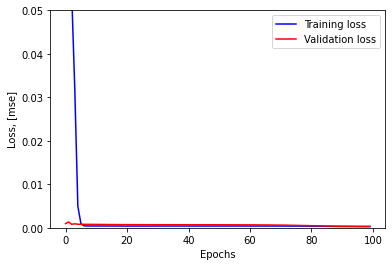

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.05])
plt.show()

In [15]:
X_pred = model.predict(X_train)

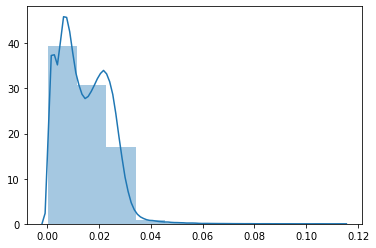

In [16]:
import seaborn as sns

scored = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 10, kde= True);
#g.set(xlim=(0.05,0.10), ylim=(0, 1))
plt.show()

In [17]:
model.evaluate(X_test,X_test)

72672/72672 [==============================] - 1s 11us/step


0.0005609289730168377

In [18]:
TH = 0.06
scored = pd.DataFrame()
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
scored['Threshold'] = TH
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.sample(100)

,Loss_mae,Threshold,Anomaly
65958,0.026070,0.06,False
83348,0.023678,0.06,False
279712,0.002223,0.06,False
91137,0.025955,0.06,False
197927,0.049145,0.06,False
...,...,...,...
44600,0.027751,0.06,False
107983,0.008458,0.06,False
20271,0.023635,0.06,False
98452,0.008847,0.06,False


In [19]:
X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train)

scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

In [20]:
scored_train['Loss_mae'].mean()

0.014469563785348444

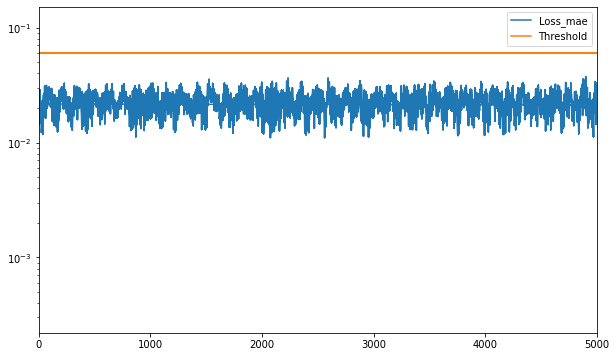

In [21]:
scored.plot(logy=True,  figsize = (10,6), xlim =[0,5000])

In [22]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.021651,0.06,False
1,0.017471,0.06,False
2,0.015326,0.06,False
3,0.014174,0.06,False
4,0.018264,0.06,False
...,...,...,...
290683,0.000957,0.06,False
290684,0.000765,0.06,False
290685,0.004587,0.06,False
290686,0.007754,0.06,False


In [23]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

        Loss_mae  Threshold  Anomaly
103138  0.065689       0.06     True
106027  0.060987       0.06     True
108079  0.061434       0.06     True
126556  0.061652       0.06     True
132717  0.061900       0.06     True
...          ...        ...      ...
287981  0.071908       0.06     True
288792  0.069270       0.06     True
288796  0.091857       0.06     True
288798  0.069023       0.06     True
289610  0.069372       0.06     True

[316 rows x 3 columns]
(316, 3)


In [24]:
NB_anomalies = anomalies[anomalies.index <= 96896]
print(NB_anomalies)
print(NB_anomalies.shape)

Empty DataFrame
Columns: [Loss_mae, Threshold, Anomaly]
Index: []
(0, 3)


In [25]:
IROR21_anomalies = anomalies[anomalies.index > 96896]
print(IROR21_anomalies)
print(IROR21_anomalies.shape)

        Loss_mae  Threshold  Anomaly
103138  0.065689       0.06     True
106027  0.060987       0.06     True
108079  0.061434       0.06     True
126556  0.061652       0.06     True
132717  0.061900       0.06     True
...          ...        ...      ...
287981  0.071908       0.06     True
288792  0.069270       0.06     True
288796  0.091857       0.06     True
288798  0.069023       0.06     True
289610  0.069372       0.06     True

[316 rows x 3 columns]
(316, 3)


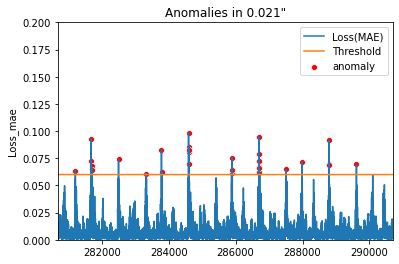

In [26]:
plt.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
plt.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (len(scored_train.index)-10000, len(scored_train.index)), ylim = (0, 0.2))
plt.title('Anomalies in 0.021"')
plt.legend();